# Wave Equation Testing

The purpose of this code is to test methods associated with assignment 5, wave equations.

In [1]:
# load useful libraries
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML, display
import scipy.integrate

## Task 1

Write a program to calculate the energies as a function of time for the 1-d wave equation with cyclic boundary conditions.

In [3]:
def wave_stepper(u, dt, init_vel = 0, Courant=0.1, nsteps=99, save_stride=9, free = False, boundary_hack=False):
    """Iterates the numerical finite difference method for the 1D-wave equation with
    initial condition u. If free is true then the boundaries are considered to be 
    free rings allowing the wave to ride up and down. If boundary_hack is true and
    free is false the boundaries are considered to be fixed points so the wave reverses
    its orientation upon reflection. Otherwise cyclic boundaries are used.
    
    Arguments:
    u -- the initial wave heights
    dt -- the size of the time step
    init_vel -- array of initial wave velocities
    Courant -- the Courant constant for the numerical solution = wave_speed*dt/dx
    nsteps -- number of steps for the numerical solution
    save_stride -- number of iterations between saves of the wave height
    free -- boolean for if there is a free boundary at the ends of the interval
    boundary_hack -- boolean for if there is a strict boundary at the ends of the interval
    
    Result:
    result -- an array of wave heights at various times
    """
    
    # Initializes the current and next wave heights
    u_cur = u.copy()
    u_next = 0*u.copy()
    
    # spatial second derivative difference equation assuming 
    # cyclic ("wrap-around") boundaries
    d2u = lambda u: np.roll(u,-1) - 2*u + np.roll(u,+1)
    
    # Initializes the previous wave height
    u_last = u_cur - dt*init_vel + 0.5*Courant**2*d2u(u_cur)
    
    # Applies the appropriate boundary conditions based on the inputted booleans
    if free:
        # Apply free boundary conditions
        u_next[0] = -u_last[0]+2*u_cur[0]+2*Courant**2*(u_cur[1]-u_cur[0])
        u_next[-1] = -u_last[-1]+2*u_cur[-1]+2*Courant**2*(u_cur[-2]-u_cur[-1])
    elif boundary_hack:
        # Applies fixed boundary conditions
        u_next[0], u_next[-1] = 0, 0
    
    
    # Initialize a list for holding wave heights at various times
    result = []
    
    # Iterates the numerical wave solution nsteps number of times
    for n in range(nsteps):
        
        # Obtains the next wave height using finite differences
        u_next = 2*u_cur - u_last + Courant**2*d2u(u_cur)
        
        # Applies the appropriate boundary conditions based on the inputted booleans
        if free:
            # Apply free boundary conditions
            u_next[0] = -u_last[0]+2*u_cur[0]+2*Courant**2*(u_cur[1]-u_cur[0])
            u_next[-1] = -u_last[-1]+2*u_cur[-1]+2*Courant**2*(u_cur[-2]-u_cur[-1])
        elif boundary_hack:
            # Applies fixed boundary conditions
            u_next[0], u_next[-1] = 0, 0
                 
        # Sets previous = current wave height
        u_last = u_cur[:]  
        #  Sets current = next wave height
        u_cur = u_next[:] 
        
        # save results at every save_stride-th time step for analysis and display
        if (n%save_stride)==0: result.append(u_cur.copy())
    
    return result

In [15]:
def wave_solver(u, xsteps, tsteps, wave_speed=1.0, save_stride=1, free = False, boundary_hack=False):
    """Obtains a solution to the wave equation with a given initial condition
    and boundary conditions.
    
    Arguments:
    u -- initial wave heights
    xsteps -- array of x coordinates
    tsteps -- array of times coordiantes
    wave_speed -- the speed of the wave
    save_stride -- number of iterations between saves of the wave height
    free -- boolean for if there is a free boundary at the ends of the interval
    boundary_hack -- boolean for if there is a strict boundary at the ends of the interval
    
    Result:
    result -- an array of wave heights at various times
    """
    
    # Obtains the time and distance step sizes
    dt = tsteps[1] - tsteps[0]
    dx = xsteps[1] - xsteps[0]
    
    # Obtains the Courant number
    C = wave_speed * dt / dx
    
    # Prints a warning if the Courant number is too large
    if (C>0.95):
        print('Warning- large Courant number: '+str(C)[0:4])
    
    # Obtains an array of wave heights at certain time steps
    result = wave_stepper(u, dt, Courant = C, nsteps = len(tsteps), save_stride=save_stride, 
                        free = free, boundary_hack=boundary_hack )
    
    return result

In [ ]:
def even(f, a, b, n):
    """"""
    
    # Initialize sum and increment amount
    result = 0
    h = (b-a)/n
    
    for i in range(1,(n//2)):
        result += f(h*2*i)

    return result

In [ ]:
def odd(f, a, b, n):
    """"""
    
    # Initialize sum and increment amount
    result = 0
    h = (b-a)/n
    
    for i in range(1,(n//2+1)):
        result += f(h*(2*i-1))
    return result

In [ ]:
def simpson(f, a, b, n = 1000):
    """Implementation of Simpson's method of numerical integration
    Returns the approximate integral of f from a to b"""
    
    # Interval widths
    h = (b-a)/n
    
    approx = f(a)+2*even(f, a, b, n)+4*odd(f, a, b, n)+f(b)
    
    return h*approx/3

In [5]:
def wave_energies(xstep, tstep, wave_speed, u0, free = False, boundary_hack = False):
    
    wave_heights, C = wave_solver(u0, xstep, tstep, wave_speed=wave_speed, save_stride=1, 
                                  free = free, boundary_hack=boundary_hack)
    
    # Obtains changes in time and space
    delta_x = xstep[1] - xstep[0]
    delta_t = tstep[1] - tstep[0]
    
    # Obtains array of time derivatives
    du_dts = (np.roll(wave_heights, -1, axis = 0) - np.roll(wave_heights, +1, axis = 0))/(2*delta_t)
    du_dts[-1] = wave_heights[]
    du_dts[0] = wave_heights[0]*0.0
    
    # Obtains array of spatial derivatives
    du_dxs = (np.roll(wave_heights, -1, axis = 1) - np.roll(wave_heights, +1, axis = 1))/(2*delta_x)
    du_dxs = du_dxs[0:-1]
    du_dts_transpose = du_dts.T
    du_dxs_transpose = du_dxs.T
    
    kin_energy = np.array(tstep[0:-1])*0.0
    pot_energy = np.array(tstep[0:-1])*0.0
    
    for i in range(len(xstep) - 2):
        kin_energy += (du_dts_transpose[i]**2+du_dts_transpose[i+1]**2)*delta_x/4
        pot_energy += (du_dxs_transpose[i]**2+du_dxs_transpose[i+1]**2)*c**2*delta_x/4
    
    
    
    
#     def du_dtSquare(index):
        
#         # Transposes the du_dts array so that rows correspond to x coordinates
#         du_dts_transpose = np.copy(du_dts).T
        
#         assert(0 <= index < len(du_dts_transpose))
        
#         return du_dts_transpose[int(index)]**2
    
#     def du_dxSquare(index):
        
#         # Transposes the du_dxs array so that rows correspond to x coordinates
#         du_dxs_transpose = np.copy(du_dxs).T
        
#         assert(0 <= index < len(du_dxs_transpose))
        
#         return du_dxs_transpose[int(index)]**2
    
    
#     kin_energy = wave_speed**2*simpson(du_dtSquare, xstep[0], xstep[-1], n = len(xstep))/2
    
#     pot_energy = simpson(du_dxSquare, xstep[0], xstep[-1], n = len(xstep))/2
    
    return kin_energy, pot_energy

In [69]:
def wave_energies2(xstep, tstep, wave_speed, u0, free = False, boundary_hack = False):
    
    wave_heights = wave_solver(u0, xstep, tstep, wave_speed=wave_speed, save_stride=1, 
                                  free = free, boundary_hack=boundary_hack)
    wave_heights = np.array(wave_heights)
    
    # Obtains changes in time and space
    delta_x = xstep[1] - xstep[0]
    delta_t = tstep[1] - tstep[0]
    
    # Obtains array of time derivatives
    du_dts = np.array((np.roll(wave_heights, -1, axis = 0) - np.roll(wave_heights, +1, axis = 0))/(2*delta_t))
    # Uses a backward difference estimate on the last time derivative 
    du_dts[-1] = (wave_heights[-1] - wave_heights[-2])/delta_t
    
    # Sets the initial time derivatives to 0, corresponding to an initially stationary wave
    du_dts[0] = wave_heights[0]*0.0
    
    # Obtains array of spatial derivatives
    du_dxs = np.array((np.roll(wave_heights, -1, axis = 1) - np.roll(wave_heights, +1, axis = 1))/(2*delta_x))
    
    # If a non-cyclic boundary is used, use a forward difference estimate for the derivative on the left edge
    # and a backward difference estimate for the derivative on the right edge
    if free or boundary_hack:
        du_dxs[:,0] = (wave_heights[:,1] - wave_heights[:,0])/delta_x
        du_dxs[:,-1] = (wave_heights[:,-1] - wave_heights[:,-2])/delta_x
    
    # Transposes the du_dts and du_dxs arrays so that rows correspond to x coordinates
    du_dts_transpose = du_dts.T
    du_dxs_transpose = du_dxs.T
    
    kin_energy = scipy.integrate.trapezoid(du_dts_transpose**2, axis = 0)/2 # , x = xstep[0:-1], dx = delta_x,
    pot_energy = scipy.integrate.trapezoid(du_dxs_transpose**2, axis = 0)*c**2/2 # x = xstep[0:-1], dx = delta_x, 
    
    return kin_energy, pot_energy

In [47]:
def wave_energies3(xstep, tstep, wave_speed, wave_heights, free = False, boundary_hack = False):
    
    # Obtains changes in time and space
    delta_x = xstep[1] - xstep[0]
    delta_t = tstep[1] - tstep[0]
    
    # Obtains array of time derivatives
    du_dts = (np.roll(wave_heights, -1, axis = 0) - np.roll(wave_heights, +1, axis = 0))/(2*delta_t)
    du_dts = du_dts[0:-1]
    du_dts[0] = wave_heights[0]*0.0
    
    # Obtains array of spatial derivatives
    du_dxs = (np.roll(wave_heights, -1, axis = 1) - np.roll(wave_heights, +1, axis = 1))/(2*delta_x)
    if free or boundary_hack:
        du_dxs[:][0] = (wave_heights[:][1] - wave_heights[:][0])/delta_x
        du_dxs[:][-1] = (wave_heights[:][-1] - wave_heights[:][-2])/delta_x
    du_dxs = du_dxs[0:-1]
    
    # Transposes the du_dts and du_dxs arrays so that rows correspond to x coordinates
    du_dts_transpose = du_dts.T
    du_dxs_transpose = du_dxs.T
    
    
    kin_energy = scipy.integrate.trapezoid(du_dts_transpose**2, axis = 0)/2 # , x = xstep[0:-1], dx = delta_x,
    pot_energy = scipy.integrate.trapezoid(du_dxs_transpose**2, axis = 0)*c**2/2 # x = xstep[0:-1], dx = delta_x, 
    
    return kin_energy, pot_energy

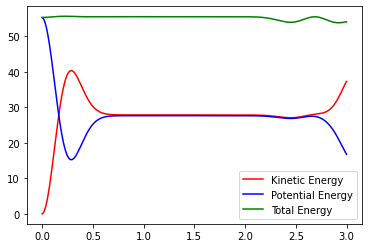

In [73]:
c = 0.3
t = np.linspace(0.0, 3.0, 999)
x = np.linspace(0.0, 2.0, 199)
u0 = np.exp( -((x-0.8)*10)**2 )

KE, PE = wave_energies2(x, t, c, u0, free = False, boundary_hack = False)

plt.plot(t, KE, color = 'r', label = "Kinetic Energy")
plt.plot(t, PE, color = 'b', label = "Potential Energy")
plt.plot(t, KE+PE, color = 'g', label = "Total Energy")
plt.legend()

## Task 2

Calculate and plot the energies for the following parameters:

\begin{align*}
    c &= 0.3 \\
    t &= np.linspace(0.0, 3.0, 999) \\
    x &= np.linspace(0.0, 2.0, 199) \\
    u0 &= np.exp( -((x-0.8)*10)**2 )
\end{align*}

Is total energy conserved?  Discuss.

In [ ]:
c = 0.3
t = np.linspace(0.0, 6.0, 5000)
x = np.linspace(0.0, 2.0, 3000)
u0 = np.exp( -((x-0.8)*10)**2 )

KE, PE = wave_energies(x, t, c, u0, free = False, boundary_hack = False)

plt.plot(t, KE, color = 'r', label = "Kinetic Energy")
plt.plot(t[0:-1], PE, color = 'b', label = "Potential Energy")
plt.plot(t[0:-1], KE+PE, color = 'g', label = "Total Energy")
plt.legend()

## Task 3

 The wave_stepper function defaults to using cyclic boundary conditions, but has a keyword option which effectively absorbs waves at the boundaries:

    if boundary_hack:
        u2[0], u2[-1] = 0, 0
   
Modify wave_stepper to include perfectly reflecting boundaries and check whether energy is conserved.

In [28]:
def gaussian(A, L, T, Nxsteps = 199, Ntsteps = 9999, wave_speed=1.0, 
             save_stride=20, frames = 6000, interval = 20, free = True):
    
    tsteps = np.linspace(0.0, T, Ntsteps)
    xsteps = np.linspace(0.0, L, Nxsteps)
    
    # Initializes the initial shape of the standing wave
    u = np.exp( -((xsteps-0.8)*10)**2 )
    
    # Obtains the solution of the wave equation over the specified time
    wave_heights = wave_solver(u, xsteps, tsteps, wave_speed=wave_speed, save_stride=save_stride, 
                                  free = free, boundary_hack=True)
    
    return wave_heights, xsteps, tsteps

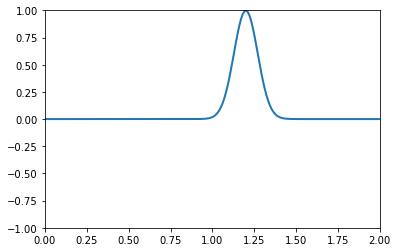

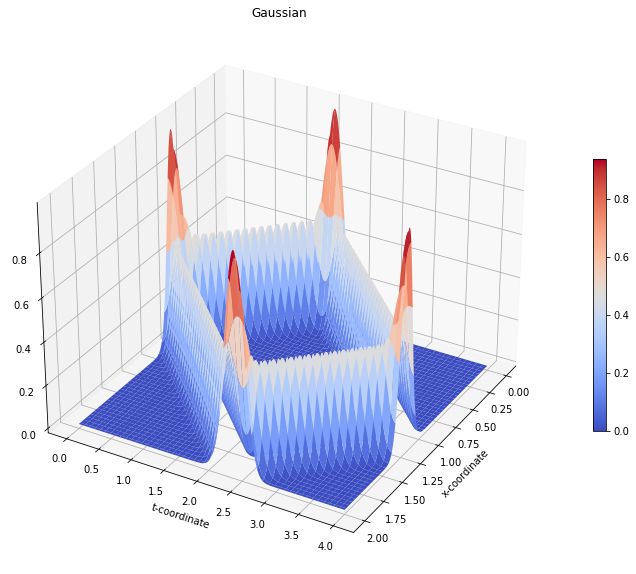

In [29]:
argsg = [1.0, 2.0, 4.0]
kwargsg = {"Nxsteps" : 199, "Ntsteps" : 600, "wave_speed" : 0.5, "save_stride" : 1}
kwargsg2 = {"Nxsteps" : 199, "Ntsteps" : 600, "wave_speed" : 0.5, "save_stride" : 1}

wave_ani(2.0, 1.0, gaussian, *argsg, frames = 600, interval = 1, **kwargsg)
surface_Plot(1.0, 1.0, gaussian, "Gaussian", *argsg, **kwargsg2)

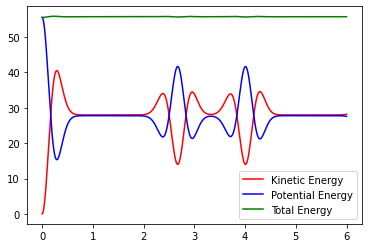

In [71]:
c = 0.3
t = np.linspace(0.0, 6.0, 10000)
x = np.linspace(0.0, 2.0, 200)
u0 = np.exp( -((x-0.8)*10)**2 )
#u0 = 0.5*np.sin(1*np.pi*x)

KE, PE = wave_energies2(x, t, c, u0, free = True, boundary_hack = True)

plt.plot(t, KE, color = 'r', label = "Kinetic Energy")
plt.plot(t, PE, color = 'b', label = "Potential Energy")
plt.plot(t, KE+PE, color = 'g', label = "Total Energy")
plt.legend()

In [57]:
A = np.array([[1,2],[3,4]])
A[1,1]

4

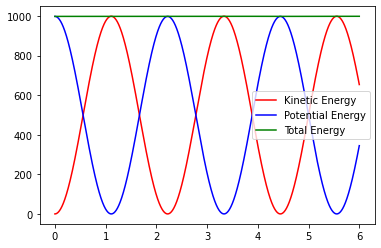

In [31]:
c = 0.3
t = np.linspace(0.0, 6.0, 50000)
x = np.linspace(0.0, 2.0, 2000)
waves, tstep,xstep = numericStandingWave(1.0, 2.0, 6.0, harmonic = 3, Nxsteps = 2000, Ntsteps = 50000, wave_speed=0.3, save_stride=1)

KE, PE = wave_energies3(x, t, c, waves, free = True, boundary_hack = False)

plt.plot(t[0:-1], KE, color = 'r', label = "Kinetic Energy")
plt.plot(t[0:-1], PE, color = 'b', label = "Potential Energy")
plt.plot(t[0:-1], KE+PE, color = 'g', label = "Total Energy")
plt.legend()

## Optional 

It is interesting to simulate a standing wave on [0,L] and determine the error in the simulation as a function of time and location. Any choices for  𝐴  and  𝑚  should work, but simple values (ie.  𝐴=1  and  𝑚=1 ) might be best.

In [8]:
def wave_ani(L, amp, wave_func, *args, frames = 100, interval = 20, **kwargs):
    """Animates a given wave function.
    
    Arguments:
    L -- the length of the region containing the wave
    amp -- the amplitude of the wave
    wave_func -- the function describing the wave
    *args -- the primary arguments of the wave function
    frames -- the number of frames in the animation
    interval -- the interval between frames
    **kwargs -- the keyword arguments of the wave function
    """
    
    # Obtains the wave height, array of x values, and array of time values for 
    # the given wave function and parameters
    wave_heights, xstep, tstep = wave_func(*args, **kwargs)
    
    # Initialize plotting axes
    fig, axes = plt.subplots()
    axes.set_xlim(0.0, L)
    axes.set_ylim(-amp,amp)
    
    # Initialize line object for animating
    line, = axes.plot([], [], lw=2)

    
    def init():
        """Initialization function for the FuncAnimation method"""
        line.set_data([],[])
        return (line,)

    def animate(i):
        """Animate function for the FuncAnimation function"""
        line.set_data(xstep,wave_heights[i])
        return (line,)

    # Obtains the frames of the animation
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval, 
                                   blit=True)
    # Animates the result
    display(HTML(anim.to_jshtml()))

In [9]:
def wave_ani_comp(L, amp, wave_func1, wave_func2, *args, frames = 100, interval = 20, **kwargs):
    """Animates a given wave function.
    
    Arguments:
    L -- the length of the region containing the wave
    amp -- the amplitude of the wave
    wave_func1 -- the function describing the wave
    *args -- the primary arguments of the wave function
    frames -- the number of frames in the animation
    interval -- the interval between frames
    **kwargs -- the keyword arguments of the wave function
    """
    
    # Obtains the wave height, array of x values, and array of time values for 
    # the given wave function and parameters
    wave_heights1, xstep1, tstep1 = wave_func1(*args, **kwargs)
    wave_heights2, xstep2, tstep2 = wave_func2(*args, **kwargs)
    
    # Initialize plotting axes
    fig, axes = plt.subplots()
    axes.set_xlim(0.0, L)
    axes.set_ylim(-amp,amp)
    line, = axes.plot([], [], lw=2)
    
    plot_colors = ["red", "blue"]
    lines = []
    
    for index in range(2):
        # Initialize line object for animating
        line, = axes.plot([], [], lw=2, color = plot_colors[index], label = f"Wave {index}")
        lines.append(line)

    plt.legend()
    
    def init():
        """Initialization function for the FuncAnimation method"""
        for line in lines:
            line.set_data([],[])
        return lines

    def animate(i):
        """Animate function for the FuncAnimation function"""
        lines[0].set_data(xstep1,wave_heights1[i])
        lines[1].set_data(xstep2,wave_heights2[i])
        return lines

    # Obtains the frames of the animation
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval, 
                                   blit=True)
    # Animates the result
    display(HTML(anim.to_jshtml()))

In [10]:
def surface_Plot(L, amp, wave_func, title, *args, **kwargs):
    """Plots a wave through time as a 3D-surface.
    
    Arguments:
    L -- the length of the region containing the wave
    amp -- the amplitude of the wave
    wave_func -- the function describing the wave
    title -- the title of the surface plot
    *args -- the primary arguments of the wave function
    **kwargs -- the keyword arguments of the wave function
    """
    
    # Obtains the wave height, array of x values, and array of time values for 
    # the given wave function and parameters
    wave_heights, xstep, tstep = wave_func(*args, **kwargs)
    
    # Turns the wave height and x and time coordinates into appropriately sized arrays for plotting
    wave_heights = np.array(wave_heights)
    XX,TT = np.meshgrid( xstep, tstep )

    # Initializes the 3D figure and plots the wave over time
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface( XX, TT, np.array(wave_heights), cmap=plt.cm.coolwarm)
    
    # Adds a colorbar and labels, and sets the orientation of the axes
    plt.colorbar(surf, shrink=0.5)
    ax.view_init(30, 30)
    ax.set_xlabel('x-coordinate')
    ax.set_ylabel('t-coordinate')
    ax.set_title(title)

In [11]:
def contour_Plot(L, amp, wave_func, title, *args, **kwargs):
    """Plots a wave through time as a 3D-surface.
    
    Arguments:
    L -- the length of the region containing the wave
    amp -- the amplitude of the wave
    wave_func -- the function describing the wave
    title -- the title of the contour plot
    *args -- the primary arguments of the wave function
    **kwargs -- the keyword arguments of the wave function
    """
    
    # Obtains the wave height, array of x values, and array of time values for 
    # the given wave function and parameters
    wave_heights, xstep, tstep = wave_func(*args, **kwargs)
    
    # Turns the wave height and x and time coordinates into appropriately sized arrays for plotting
    wave_heights = np.array(wave_heights)
    XX,TT = np.meshgrid( xstep, tstep )

    # Initializes the 3D figure and plots the wave over time
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    surf = ax.contourf( XX, TT, np.array(wave_heights), cmap=plt.cm.coolwarm)
    
    # Adds a colorbar and labels, and sets the orientation of the axes
    plt.colorbar(surf, shrink=0.5)
    ax.set_xlabel('x-coordinate')
    ax.set_ylabel('t-coordinate')
    ax.set_title(title)

In [18]:
# Standing wave
def numericStandingWave(A, L, T, harmonic = 1, Nxsteps = 199, Ntsteps = 9999, wave_speed=1.0, save_stride=20):
    """Obtains the numerical solution for a standing wave along a string
    of length L and over a time T.
    
    Arguments:
    A -- the amplitude of the wave
    harmonic -- the harmonic for the standing wave
    L -- the length of the region containing the wave
    T -- the amount of time we calculate the wave's behaviour
    Nxsteps -- the number of steps for the x array
    Ntsteps -- the number of steps for the time array
    wave_speed -- the wave_speed
    save_stride -- the number of iterations between saves of the wave height
    
    Results:
    wave_heights -- an array of wave heights at equally spaced times
    xsteps -- array of x coordinates
    tsteps -- array of times
    """
    
    # Obtains x and time axes
    xsteps = np.linspace(0.0, L, Nxsteps)
    tsteps = np.linspace(0.0, T, Ntsteps)
    
    # Initializes the initial shape of the standing wave
    u = A*np.sin(harmonic*np.pi*xsteps/L)
    
    # Obtains the solution of the wave equation over the specified time
    wave_heights = wave_solver(u, xsteps, tsteps, wave_speed=wave_speed, save_stride=save_stride, 
                                  free = False, boundary_hack=True)
    
    return wave_heights, xsteps, tsteps

In [13]:
def analyticStandingWave(A, L, T, harmonic = 1, Nxsteps = 199, Ntsteps = 9999, wave_speed=1.0, save_stride=20):
    """Obtains the analytic solution for a standing wave along a string
    of length L and over a time T.
    
    Arguments:
    A -- the amplitude of the wave
    harmonic -- the harmonic for the standing wave
    L -- the length of the region containing the wave
    T -- the amount of time we calculate the wave's behaviour
    Nxsteps -- the number of steps for the x array
    Ntsteps -- the number of steps for the time array
    wave_speed -- the wave_speed
    save_stride -- the number of iterations between saves of the wave height
    
    Results:
    wave_heights -- an array of wave heights at equally spaced times
    xsteps -- array of x coordinates
    tsteps -- array of times
    """
    
    # Initializes a function for the numerical solution
    u_func = lambda x, t: A*np.sin(harmonic*np.pi*x/L)*np.cos(harmonic*np.pi*wave_speed*t/L)
    
    # Obtains x and time axes
    xsteps = np.linspace(0.0, L, Nxsteps)
    tsteps = np.linspace(0.0, T, Ntsteps)
    
    # Initializes a list for storing wave heights for various times
    wave_heights = []
    
    # Iterates the wave height over time, storing specified iteration steps
    for n in range(Ntsteps):
        
        # Obtains the next set of wave heights
        u_cur = u_func(xsteps, tsteps[n])
        
        # save results at every save_stride-th time step for analysis and display
        if (n%save_stride)==0: wave_heights.append(u_cur.copy())
    
    
    return wave_heights, xsteps, tsteps

In [ ]:

args = [1.0, 1.0, 10.0]
kwargs = {"harmonic" : 2, "Nxsteps" : 100, "Ntsteps" : 1000, "wave_speed" : 0.3, "save_stride" : 5}

wave_ani_comp(1.0, 1.0, numericStandingWave, analyticStandingWave, *args, frames = 100, interval = 10, **kwargs)

In [ ]:
args = [1.0, 1.0, 10.0]
kwargs = {"harmonic" : 1, "Nxsteps" : 199, "Ntsteps" : 9999, "wave_speed" : 1.0, "save_stride" : 20}

wave_ani(1.0, 1.0, numericStandingWave, *args, **kwargs)

In [ ]:
args = [1.0, 1.0, 10.0]
kwargs = {"harmonic" : 5, "Nxsteps" : 199, "Ntsteps" : 9999, "wave_speed" : 1.0, "save_stride" : 20}

wave_ani(1.0, 1.0, analyticStandingWave, *args, **kwargs)

In [ ]:
args2 = [1.0, 1.0, 6.0]
kwargs2 = {"harmonic" : 3, "Nxsteps" : 199, "Ntsteps" : 9999, "wave_speed" : 1.0, "save_stride" : 1}

surface_Plot(1.0, 1.0, numericStandingWave, "Numerical Standing Wave", *args2, **kwargs2)

In [ ]:
args2 = [1.0, 1.0, 10.0]
kwargs2 = {"harmonic" : 1, "Nxsteps" : 199, "Ntsteps" : 9999, "wave_speed" : 1.0, "save_stride" : 1}

contour_Plot(1.0, 1.0, numericStandingWave, "Numerical Standing Wave", *args2, **kwargs2)

In [ ]:
def comp_Func(analytic, numerical, *args, **kwargs):
    """Obtains a comparison function for a pair of analytic and
    numerical solutions with given arguments and key-word arguments.
    
    Arguments:
    analytic -- the analytical solution function for the wave equation
    numerical -- the numerical solution function for the wave equation
    *args -- the arguments of the solution functions
    **kwargs -- the keyword arguments of the solution functions
    
    Returns:
    compare -- a function returning the difference between the numerical and anlytic solutions
    """
    
    def compare(*args, **kwargs):
        """Comparison function which returns the difference in wave heights
        and the step arrays for the x and time directions.
        
        Arguments:
        *args -- the arguments of the solution functions
        **kwargs -- the keyword arguments of the solution functions

        Returns:
        np.array(analytic_heights) - np.array(numerical_heights) -- the difference in the numerical and analytic wave heights
        analytic_xstep -- an array of x-coordinates
        analytic_tstep -- an array of times
        """
        
        # Obtains the analytic and numerical wave heights over time as well as their x and time steps
        analytic_heights, analytic_xstep, analytic_tstep = analytic(*args, **kwargs)
        numerical_heights, numerical_xstep, numerical_tstep = numerical(*args, **kwargs)
        
        
        return np.array(analytic_heights) - np.array(numerical_heights), analytic_xstep, analytic_tstep
    
    return compare

In [ ]:
args2 = [1.0, 1.0, 10.0]
kwargs2 = {"harmonic" : 1, "Nxsteps" : 199, "Ntsteps" : 9999, "wave_speed" : 1.0, "save_stride" : 1}

standingCompare = comp_Func(analyticStandingWave, numericStandingWave, *args2, **kwargs2)

surface_Plot(1.0, 1.0, standingCompare, "Numerical Standing Wave Error", *args2, **kwargs2)

In [ ]:
args2 = [1.0, 1.0, 10.0]
kwargs2 = {"harmonic" : 1, "Nxsteps" : 199, "Ntsteps" : 9999, "wave_speed" : 1.0, "save_stride" : 1}

standingCompare = comp_Func(analyticStandingWave, numericStandingWave, *args2, **kwargs2)

contour_Plot(1.0, 1.0, standingCompare, "Numerical Standing Wave Error", *args2, **kwargs2)

In [ ]:
args = [1.0, 1.0, 10.0]
kwargs = {"harmonic" : 1, "Nxsteps" : 199, "Ntsteps" : 9999, "wave_speed" : 1.0, "save_stride" : 20}

standingCompare2 = comp_Func(analyticStandingWave, numericStandingWave, *args, **kwargs)

wave_ani(1.0, 0.01, standingCompare2, *args, **kwargs)

## Testing

In [ ]:
x = np.linspace(0.0, 2.0, 199)
y0 = np.exp( -((x-0.8)*10)**2 )
nsteps=999

yy = wave_stepperReflect(y0, 0.01, Courant=0.25, nsteps=nsteps, save_stride=20) #False)
xx, my = np.meshgrid( x, np.arange(len(yy)) )
#print( len(yy), yy[0].shape, x.shape )

fig, axes = plt.subplots()
axes.set_xlim(0,2)
axes.set_ylim(-1,1)
line, = axes.plot([], [], lw=2)

def init():
    line.set_data([],[])
    return (line,)

def animate(i):

    line.set_data(x,yy[i])
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=20, 
                               blit=True)

HTML(anim.to_jshtml())